In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car08= pd.read_csv('clean08.csv')
car18 = pd.read_csv('clean18.csv')


In [3]:
car08.head()

model  displ  cyl    trans drive      fuel    veh_class  \
0  ACURA MDX    3.7    6  Auto-S5   4WD  Gasoline          SUV   
1  ACURA RDX    2.3    4  Auto-S5   4WD  Gasoline          SUV   
2   ACURA RL    3.5    6  Auto-S5   4WD  Gasoline  midsize car   
3   ACURA TL    3.2    6  Auto-S5   2WD  Gasoline  midsize car   
4   ACURA TL    3.5    6  Auto-S5   2WD  Gasoline  midsize car   

   air_pollution_score  city_mpg  hwy_mpg  cmb_mpg  greenhouse_gas_score  \
0                  7.0      15.0     20.0     17.0                     4   
1                  7.0      17.0     22.0     19.0                     5   
2                  7.0      16.0     24.0     19.0                     5   
3                  7.0      18.0     26.0     21.0                     6   
4                  7.0      17.0     26.0     20.0                     6   

  smartway  
0       no  
1       no  
2       no  
3      yes  
4      yes

In [4]:
car08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int64  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    float64
 9   hwy_mpg               987 non-null    float64
 10  cmb_mpg               987 non-null    float64
 11  greenhouse_gas_score  987 non-null    int64  
 12  smartway              987 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 100.4+ KB


In [5]:
car18.head()

model  displ  cyl       trans drive      fuel  veh_class  \
0  ACURA RDX    3.5    6  SemiAuto-6   2WD  Gasoline  small SUV   
1  ACURA RDX    3.5    6  SemiAuto-6   4WD  Gasoline  small SUV   
2  ACURA TLX    2.4    4       AMS-8   2WD  Gasoline  small car   
3  ACURA TLX    3.5    6  SemiAuto-9   2WD  Gasoline  small car   
4  ACURA TLX    3.5    6  SemiAuto-9   4WD  Gasoline  small car   

   air_pollution_score  city_mpg  hwy_mpg  cmb_mpg  greenhouse_gas_score  \
0                  3.0      20.0     28.0     23.0                     5   
1                  3.0      19.0     27.0     22.0                     4   
2                  3.0      23.0     33.0     27.0                     6   
3                  3.0      20.0     32.0     24.0                     5   
4                  3.0      21.0     30.0     24.0                     5   

  smartway  
0       No  
1       No  
2       No  
3       No  
4       No

### Q1. Find out the alternative sources of fuel available in 2008 & 2018 respectively and by how much?

In [6]:
car08['fuel'].value_counts()

fuel
Gasoline    984
CNG           1
ethanol       1
gas           1
Name: count, dtype: int64

In [7]:
car18['fuel'].value_counts()

fuel
Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: count, dtype: int64

In [8]:
car08['fuel'].value_counts().sum()-car08['fuel'].value_counts().max()

3

In [9]:
car18['fuel'].value_counts().sum()-car18['fuel'].value_counts().max()

83

### Q2. Is there any improvement in ‘fuel economy’ with respect to vehicle class from 2008 to 2018, perform the necessary steps to examine?

In [10]:
car18['veh_class'].replace(['small SUV','standard SUV'],'SUV',inplace =True)

In [11]:
car08['veh_class'].replace('van','special purpose',inplace =True)

In [12]:
group08= pd.DataFrame(car08.groupby('veh_class')['cmb_mpg'].sum())
group08.rename(columns={'cmb_mpg':'cmb_mpg 08'},inplace=True)
group08

cmb_mpg 08
veh_class                  
SUV                  5172.0
large car            1018.0
midsize car          2981.0
minivan               325.0
pickup               1351.0
small car            7028.0
special purpose       314.0
station wagon        1342.0

In [13]:
group18= pd.DataFrame(car18.groupby('veh_class')['cmb_mpg'].sum())
group18.rename(columns={'cmb_mpg':'cmb_mpg 18'},inplace=True)
group18

cmb_mpg 18
veh_class                  
SUV                  4165.0
large car            2060.0
midsize car          3848.0
minivan               104.0
pickup               1450.0
small car            7245.0
special purpose       185.0
station wagon         936.0

In [14]:
group08['cmb_mpg_18'] = group18['cmb_mpg 18']
group08

cmb_mpg 08  cmb_mpg_18
veh_class                              
SUV                  5172.0      4165.0
large car            1018.0      2060.0
midsize car          2981.0      3848.0
minivan               325.0       104.0
pickup               1351.0      1450.0
small car            7028.0      7245.0
special purpose       314.0       185.0
station wagon        1342.0       936.0

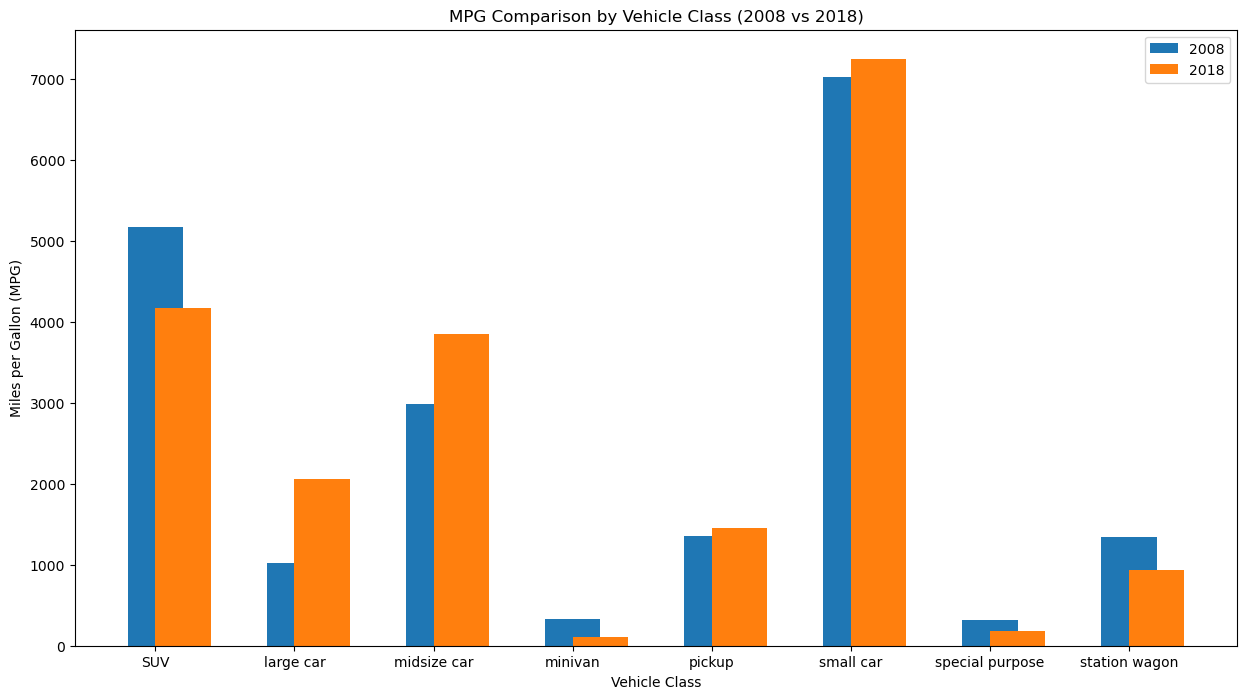

In [15]:
plt.figure(figsize=(15, 8))
plt.bar(group08.index, group08['cmb_mpg 08'], width=0.4, label='2008')
plt.bar(group08.index, group08['cmb_mpg_18'], width=0.4, label='2018', align='edge')

plt.xlabel('Vehicle Class')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('MPG Comparison by Vehicle Class (2008 vs 2018)')
plt.legend()

plt.show()

### Q3. Is there any change in characteristics of SmartWay Vehicles ?

In [16]:
smartway08=car08['smartway'].unique()
print(smartway08)

['no' 'yes']


In [17]:
smartway18=car18['smartway'].unique()
print(smartway18)

['No' 'Yes' 'Elite']


Yes there is a change. Elite class is added in the 2018 dataset

### Q4. Which all features are associated with better fuel economy?

In [18]:
features = ['displ','cyl']

In [19]:
car08[features].corr()

displ       cyl
displ  1.000000  0.899304
cyl    0.899304  1.000000

<Axes: >

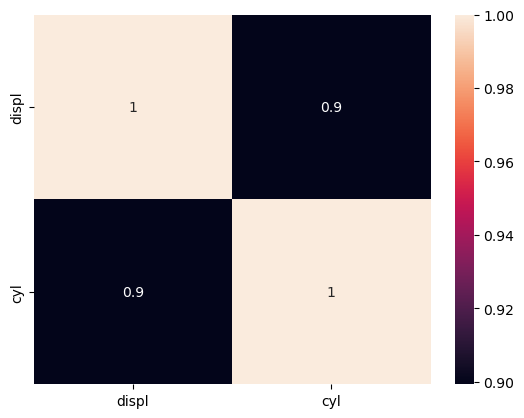

In [20]:
sns.heatmap(car08[features].corr(),annot = True)

### Q5. How much improvement is there in miles/gallon or mpg? Also, which vehicle has improved the most?

In [21]:
car08['cmb_mpg'].mean()

19.78824721377913

In [22]:
car18['cmb_mpg'].mean()

24.030048076923077

As the mpg mean increases in 2018,this means that the cars have better mileage in 2018 as compared to 2008

In [23]:
car08[['model','cmb_mpg']].max()

model      VOLVO XC 90
cmb_mpg           46.0
dtype: object

In [24]:
car18[['model','cmb_mpg']].max()

model      VOLVO XC 90
cmb_mpg          106.0
dtype: object

Volvo XC 90 has improved the most